In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data from combined csv
df = pd.read_csv('data/combined_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()
 

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,video_error_or_removed,Country Code
0,2kyS6SvSYSE,17.14.11,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,US
1,1ZAPwfrtAFY,17.14.11,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,US
2,5qpjK5DgCt4,17.14.11,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,US
3,puqaWrEC7tY,17.14.11,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,US
4,d380meD0W0M,17.14.11,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,US


In [3]:
#talk to group about dropping the following video_id's
#'#NAME?', '#VALUE!'
df_id_drop = df.drop(df[df['video_id'] == '#NAME?'].index, inplace = True)
df_value_drop = df.drop(df[df['video_id'] == '#VALUE!'].index, inplace = True)

In [4]:
#talk to group about dropping the following video_id's
#when likes and dislikes == 0 or comment_count == 0 or video_error_or_removed == True

df_like_drop = df.drop(df[df['likes'] == 0].index, inplace = True)
df_dislikes_drop = df.drop(df[df['dislikes'] == 0].index, inplace = True)
df_comment_count_drop = df.drop(df[df['comment_count'] == 0].index, inplace = True)
df_video_error_or_removed = df.drop(df[df['video_error_or_removed'] == True].index, inplace = True)
df

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,video_error_or_removed,Country Code
0,2kyS6SvSYSE,17.14.11,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,US
1,1ZAPwfrtAFY,17.14.11,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,US
2,5qpjK5DgCt4,17.14.11,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,US
3,puqaWrEC7tY,17.14.11,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,US
4,d380meD0W0M,17.14.11,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,US
5,gHZ1Qz0KiKM,17.14.11,28,2017-11-13T19:07:23.000Z,119180,9763,511,1434,False,US
6,39idVpFF7NQ,17.14.11,24,2017-11-12T05:37:17.000Z,2103417,15993,2445,1970,False,US
7,nc99ccSXST0,17.14.11,28,2017-11-12T21:50:37.000Z,817732,23663,778,3432,False,US
8,jr9QtXwC9vc,17.14.11,1,2017-11-13T14:00:23.000Z,826059,3543,119,340,False,US
9,TUmyygCMMGA,17.14.11,25,2017-11-13T13:45:16.000Z,256426,12654,1363,2368,False,US


In [5]:
#the data appears to include data for the following time range, by trending date:
#dec 1, 2017 through May 31, 2018


In [6]:
#use groupby.max() to get the max number of likes, dislikes and views and to avoid each video from appearing multiple times
df = pd.DataFrame(df.groupby(['video_id']).max())


In [7]:
#compare number of views to likes/dislikes votes?
#compare number of views to comments?
# How long a video trends to number of views?
#Top Genres?
#Most commented, Most disliked, Most liked, longest trending video, most viewed video?
total_count = len(df["category_id"].unique())
total_count

17

In [8]:
#dataframes for each country
US = df.loc[df["Country Code"]=="US"]
MX = df.loc[df["Country Code"]=="MX"]
CA = df.loc[df["Country Code"]=="CA"]
RU = df.loc[df["Country Code"]=="RU"]
DE = df.loc[df["Country Code"]=="DE"]
FR = df.loc[df["Country Code"]=="FR"]
GB = df.loc[df["Country Code"]=="GB"]
IN = df.loc[df["Country Code"]=="IN"]
JP = df.loc[df["Country Code"]=="JP"]
KR = df.loc[df["Country Code"]=="KR"]
 

In [9]:
#dataframes created to display country, video_id, views, likes

data_us = US.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_us
data_mx = MX.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_mx

data_ca = CA.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_ca

data_ru = RU.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_ru

data_de = DE.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_de

data_fr = FR.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_fr
 
data_gb = GB.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_gb

data_in = IN.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_in

data_jp = JP.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_jp

data_kr = KR.loc[:,["Country Code", "video_id", "views", "likes", "dislikes", "comment_count"]]
#data_kr

In [10]:
#sorted by views to see the highest trending video by country
trending_us = data_us.sort_values("views", axis=0, ascending=False)
trending_us.head()



,Country Code,video_id,views,likes,dislikes,comment_count
video_id,,,,,,
VYOjWnS4cMY,US,NaN,259721696,5444541,379862,553371
ffxKSjUwKdU,US,NaN,208876887,3394437,150086,259613
zEf423kYfqk,US,NaN,200862743,1668418,142569,97826
FlsCjmMhFmw,US,NaN,169884583,3312868,1753274,845233
TyHvyGVs42U,US,NaN,143408235,2686169,137938,144217


In [11]:
# How many likes and dislikes were made out of the total amount of views
likes = (trending_us['views']/trending_us['likes'])
dislikes = (trending_us['views']/trending_us['dislikes'])
view = trending_us['views']

# Create a dataframe with percentages of likes and dislikes, how many views it takes to get one like
comment = trending_us["comment_count"]
total = (trending_us['likes']+trending_us['dislikes'])
percent_likes = (trending_us['likes'] /total) *100
percent_dislikes = (trending_us['dislikes'] /total) *100

# Create a variable for my data frame
percentages_us = {"Views": view, "Comments": comment, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

# data frame coding and printing
percent_data_us = pd.DataFrame(percentages_us)
percent_data_us.head()


,Views,Comments,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
video_id,,,,,,
VYOjWnS4cMY,259721696,553371,47.703139,683.726448,93.478096,6.521904
ffxKSjUwKdU,208876887,259613,61.535061,1391.714664,95.765693,4.234307
zEf423kYfqk,200862743,97826,120.391139,1408.880914,92.127553,7.872447
FlsCjmMhFmw,169884583,845233,51.280215,96.895627,65.392324,34.607676
TyHvyGVs42U,143408235,144217,53.387644,1039.657201,95.115695,4.884305


In [12]:
#total likes, dislikes, comments, and views
views_us = data_us["views"]
total_views_us = views_us.sum(axis=0)

comments_us = data_us["comment_count"]
total_comments_us = comments_us.sum(axis=0)

dislikes_us = data_us["dislikes"]
total_dislikes_us = dislikes_us.sum(axis=0)

likes_us = data_us["likes"]
total_likes_us = likes_us.sum(axis=0)

#Print out the data
print("The United States has",total_likes_us, "total YouTube Video likes")
print("The United States has",total_dislikes_us, "total YouTube Video dislikes")
print("The United States has",total_comments_us, "total YouTube video comments")
print("The United States has",total_views_us, "total YouTube video views")


The United States has 371013637 total YouTube Video likes
The United States has 20756922 total YouTube Video dislikes
The United States has 42837034 total YouTube video comments
The United States has 14409834127 total YouTube video views


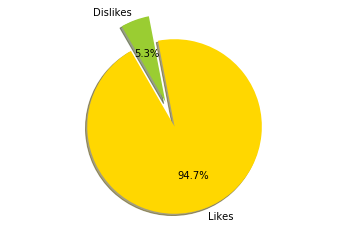

<Figure size 432x288 with 0 Axes>

In [13]:
# Data to plot
labels = 'Likes', 'Dislikes',
sizes = [total_likes_us, total_dislikes_us]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/LikesToDislikes_UnitedStates.png')

In [14]:
trending_mx = data_mx.sort_values("views", axis=0, ascending=False)
trending_mx.head()

,Country Code,video_id,views,likes,dislikes,comment_count
video_id,,,,,,
_I_D_8Z4sJE,MX,NaN,424538912,2818771,149275,99380
9jI-z9QN6g8,MX,NaN,337621571,2581961,166549,113564
kLpH1nSLJSs,MX,NaN,328860380,3823879,215530,225216
wfWkmURBNv8,MX,NaN,288811992,1618180,151147,67506
sGIm0-dQd8M,MX,NaN,167456025,1633407,74005,65395


In [15]:
# How many likes and dislikes were made out of the total amount of views
likes = (trending_mx['views']/trending_mx['likes'])
dislikes = (trending_mx['views']/trending_mx['dislikes'])
view = trending_mx['views']

# Create a dataframe with percentages of likes and dislikes, how many views it takes to get one like
comment = trending_mx["comment_count"]
total = (trending_mx['likes']+trending_mx['dislikes'])
percent_likes = (trending_mx['likes'] /total) *100
percent_dislikes = (trending_mx['dislikes'] /total) *100

# Create a variable for my data frame
percentages_mx = {"Views": view, "Comments": comment, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes}

# data frame coding and printing
percent_data_mx = pd.DataFrame(percentages_mx)
percent_data_mx.head()

,Views,Comments,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
video_id,,,,,,
_I_D_8Z4sJE,424538912,99380,150.611352,2844.005440,94.970597,5.029403
9jI-z9QN6g8,337621571,113564,130.761685,2027.160601,93.940390,6.059610
kLpH1nSLJSs,328860380,225216,86.001775,1525.821835,94.664318,5.335682
wfWkmURBNv8,288811992,67506,178.479521,1910.802014,91.457373,8.542627
sGIm0-dQd8M,167456025,65395,102.519473,2262.766367,95.665662,4.334338


In [16]:
#total likes, dislikes, comments, and views
views_mx = data_mx["views"]
total_views_mx = views_mx.sum(axis=0)

comments_mx = data_mx["comment_count"]
total_comments_mx = comments_mx.sum(axis=0)

dislikes_mx = data_mx["dislikes"]
total_dislikes_mx = dislikes_mx.sum(axis=0)

likes_mx = data_mx["likes"]
total_likes_mx = likes_mx.sum(axis=0)

#Print out the data
print("The country Mexico has",total_likes_mx, "total YouTube Video likes")
print("The country Mexico has",total_dislikes_mx, "total YouTube Video dislikes")
print("The country Mexico has",total_comments_mx, "total YouTube video comments")
print("The country Mexico has",total_views_mx, "total YouTube video views")


The country Mexico has 310831966 total YouTube Video likes
The country Mexico has 14829297 total YouTube Video dislikes
The country Mexico has 39396006 total YouTube video comments
The country Mexico has 10096099527 total YouTube video views


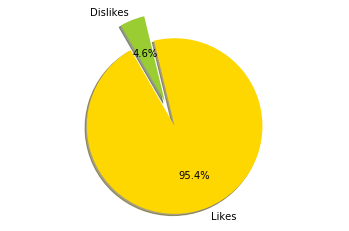

<Figure size 432x288 with 0 Axes>

In [17]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_mx,total_dislikes_mx]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0,)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/LikesToDislikes_Mexico.png')

In [18]:
trending_ca = data_ca.sort_values("views", axis=0, ascending=False)
trending_ca.head()

,Country Code,video_id,views,likes,dislikes,comment_count
video_id,,,,,,
8qs2dZO6wcc,CA,NaN,24310254,292227,10274,12429
vg0ZfeszGrU,CA,NaN,16256855,321798,14006,20453
Ha3WCbl7S7s,CA,NaN,15860214,131887,9601,6563
FsnYzwQm3gM,CA,NaN,15484992,104253,7470,7543
u5lxsBjCGc0,CA,NaN,15343697,129211,4942,4106


In [19]:
likes = (trending_ca['views']/trending_ca['likes'])

dislikes = (trending_ca['views']/trending_ca['dislikes'])
view = trending_ca['views']

vid_id = trending_ca["video_id"]
total = (trending_ca['likes']+trending_ca['dislikes'])
percent_likes = (trending_ca['likes'] /total) *100
percent_dislikes = (trending_ca['dislikes'] /total) *100

percentages_ca = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_ca = pd.DataFrame(percentages_ca)
percent_data_ca.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
video_id,,,,,,
8qs2dZO6wcc,NaN,24310254,83.189623,2366.191746,96.603648,3.396352
vg0ZfeszGrU,NaN,16256855,50.518819,1160.706483,95.829115,4.170885
Ha3WCbl7S7s,NaN,15860214,120.256083,1651.933549,93.214266,6.785734
FsnYzwQm3gM,NaN,15484992,148.532819,2072.957430,93.313821,6.686179
u5lxsBjCGc0,NaN,15343697,118.749154,3104.754553,96.316146,3.683854


In [20]:
#total likes, dislikes, comments, and views
views_ca = data_ca["views"]
total_views_ca = views_ca.sum(axis=0)

comments_ca = data_ca["comment_count"]
total_comments_ca = comments_ca.sum(axis=0)

dislikes_ca = data_ca["dislikes"]
total_dislikes_ca = dislikes_ca.sum(axis=0)

likes_ca = data_ca["likes"]
total_likes_ca = likes_ca.sum(axis=0)

#Print out the data
print("The country Canada has",total_likes_ca,"total YouTube Video likes")
print("The country Canada has",total_dislikes_ca, "total YouTube Video dislikes")
print("The country Canada has",total_comments_ca, "total YouTube video comments")
print("The country Canada has",total_views_ca, "total YouTube video views")


The country Canada has 137521572 total YouTube Video likes
The country Canada has 5869390 total YouTube Video dislikes
The country Canada has 24768779 total YouTube video comments
The country Canada has 4886838692 total YouTube video views


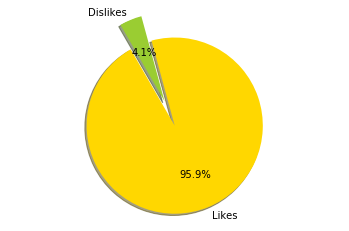

<Figure size 432x288 with 0 Axes>

In [21]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_ca,total_dislikes_ca]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0,)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/LikesToDislikes_Canada.png')

In [22]:
trending_ru = data_ru.sort_values("views", axis=0, ascending=False)
trending_ru.head()

,Country Code,video_id,views,likes,dislikes,comment_count
video_id,,,,,,
xpVfcZ0ZcFM,RU,NaN,258164991,4737873,117198,301756
au2n7VVGv_c,RU,NaN,105629911,1340938,41651,45784
fGqdIPer-ms,RU,NaN,100159686,1339372,67821,73838
gu9_m0vm7fM,RU,NaN,90111676,980263,113549,65517
z5WrgDzNIZ0,RU,NaN,76687716,1059582,119267,141358


In [23]:
likes = (trending_ru['views']/trending_ru['likes'])

dislikes = (trending_ru['views']/trending_ru['dislikes'])
view = trending_ru['views']

vid_id = trending_ru["video_id"]
total = (trending_ru['likes']+trending_ru['dislikes'])
percent_likes = (trending_ru['likes'] /total) *100
percent_dislikes = (trending_ru['dislikes'] /total) *100

percentages_ru = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_ru = pd.DataFrame(percentages_ru)
percent_data_ru.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
video_id,,,,,,
xpVfcZ0ZcFM,NaN,258164991,54.489639,2202.810551,97.586070,2.413930
au2n7VVGv_c,NaN,105629911,78.773151,2536.071427,96.987463,3.012537
fGqdIPer-ms,NaN,100159686,74.781081,1476.824081,95.180405,4.819595
gu9_m0vm7fM,NaN,90111676,91.926020,793.592863,89.618966,10.381034
z5WrgDzNIZ0,NaN,76687716,72.375442,642.991909,89.882759,10.117241


In [24]:
#total likes, dislikes, comments, and views
views_ru = data_ru["views"]
total_views_ru = views_ru.sum(axis=0)

comments_ru = data_ru["comment_count"]
total_comments_ru = comments_ru.sum(axis=0)

dislikes_ru = data_ru["dislikes"]
total_dislikes_ru = dislikes_ru.sum(axis=0)

likes_ru = data_ru["likes"]
total_likes_ru = likes_ru.sum(axis=0)

#Print out the data
print("The country Russia has",total_likes_ru, "total YouTube Video likes")
print("The country Russia has",total_dislikes_ru, "total YouTube Video dislikes")
print("The country Russia has",total_comments_ru, "total YouTube video comments")
print("The country Russia has",total_views_ru, "total YouTube video views")


The country Russia has 303929777 total YouTube Video likes
The country Russia has 38947579 total YouTube Video dislikes
The country Russia has 42557257 total YouTube video comments
The country Russia has 7582367724 total YouTube video views


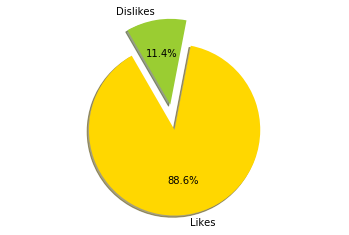

<Figure size 432x288 with 0 Axes>

In [25]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_ru,total_dislikes_ru]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/LikesToDislikes_Russia.png')

In [26]:
trending_de = data_de.sort_values("views", axis=0, ascending=False)
trending_de.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
video_id,,,,,,
-K9ujx8vO_A,DE,NaN,24065621,404788,22557,26631
4dCJgNzgs3c,DE,NaN,19757704,71072,7113,4231
7vracgLyJwI,DE,NaN,19234147,182283,15325,11946
1xq5jm0-xQc,DE,NaN,16188635,87099,25243,11765
SKVHuKegjVQ,DE,NaN,12123853,18438,7500,1209
0AcBTKITQsQ,DE,NaN,11870763,28739,7854,1242
43gm3CJePn0,DE,NaN,9929527,637997,21850,98299
XpDZhhLKwPk,DE,NaN,9103904,13569,9186,1071
LW_1PnXIJ-I,DE,NaN,8045467,15137,5651,1186


In [27]:
likes = (trending_de['views']/trending_de['likes'])
dislikes = (trending_de['views']/trending_de['dislikes'])
view = trending_de['views']

vid_id = trending_de["video_id"]
total = (trending_de['likes']+trending_de['dislikes'])
percent_likes = (trending_de['likes'] /total) *100
percent_dislikes = (trending_de['dislikes'] /total) *100

percentages_de = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_de = pd.DataFrame(percentages_de)
percent_data_de.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
video_id,,,,,,
-K9ujx8vO_A,NaN,24065621,59.452407,1066.880392,94.721595,5.278405
4dCJgNzgs3c,NaN,19757704,277.995610,2777.689301,90.902347,9.097653
7vracgLyJwI,NaN,19234147,105.518052,1255.083002,92.244747,7.755253
1xq5jm0-xQc,NaN,16188635,185.864763,641.311849,77.530220,22.469780
SKVHuKegjVQ,NaN,12123853,657.547077,1616.513733,71.084895,28.915105


In [28]:
#total likes, dislikes, comments, and views
views_de = data_de["views"]
total_views_de = views_de.sum(axis=0)

comments_de = data_de["comment_count"]
total_comments_de = comments_de.sum(axis=0)

dislikes_de = data_de["dislikes"]
total_dislikes_de = dislikes_de.sum(axis=0)

likes_de = data_de["likes"]
total_likes_de = likes_de.sum(axis=0)

#Print out the data
print("The country Germany has",total_likes_de, "total YouTube Video likes")
print("The country Germany has",total_dislikes_de, "total YouTube Video dislikes")
print("The country Germany has",total_comments_de, "total YouTube video comments")
print("The country Germany has",total_views_de, "total YouTube video views")


The country Germany has 139597615 total YouTube Video likes
The country Germany has 8930470 total YouTube Video dislikes
The country Germany has 19244277 total YouTube video comments
The country Germany has 4290574024 total YouTube video views


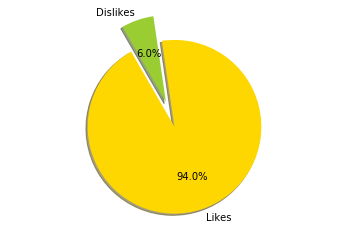

<Figure size 432x288 with 0 Axes>

In [29]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_de,total_dislikes_de]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/LikesToDislikes_Germany.png')

In [30]:
trending_fr = data_fr.sort_values("views", axis=0, ascending=False)
trending_fr.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
video_id,,,,,,
IZODr96ZRCc,FR,NaN,19063679,208485,27477,15719
5__KOPGuLDE,FR,NaN,18510658,48814,16501,6316
lhnmVSB-Rxc,FR,NaN,18246279,565896,82564,93253
gi80-tmEduI,FR,NaN,18092603,306373,118795,116255
jcWmC1oa4KQ,FR,NaN,12624389,391983,34575,40758
Ed-A73MxMgo,FR,NaN,12118553,50708,10266,3075
T95aDYxkl6w,FR,NaN,9727692,61823,4958,1785
0hdnQ8EXdEs,FR,NaN,9333942,88759,5850,16684
OaqvfQ5ggas,FR,NaN,8344248,27457,8211,1550


In [31]:
likes = (trending_fr['views']/trending_fr['likes'])

dislikes = (trending_fr['views']/trending_fr['dislikes'])
view = trending_fr['views']

vid_id = trending_fr["video_id"]
total = (trending_fr['likes']+trending_fr['dislikes'])
percent_likes = (trending_fr['likes'] /total) *100
percent_dislikes = (trending_fr['dislikes'] /total) *100

percentages_fr = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_fr = pd.DataFrame(percentages_fr)
percent_data_fr.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
video_id,,,,,,
IZODr96ZRCc,NaN,19063679,91.439092,693.804964,88.355328,11.644672
5__KOPGuLDE,NaN,18510658,379.207973,1121.790073,74.736278,25.263722
lhnmVSB-Rxc,NaN,18246279,32.243167,220.995579,87.267680,12.732320
gi80-tmEduI,NaN,18092603,59.054169,152.301048,72.059280,27.940720
jcWmC1oa4KQ,NaN,12624389,32.206471,365.130557,91.894420,8.105580


In [32]:
#total likes, dislikes, comments, and views
views_fr = data_fr["views"]
total_views_fr = views_fr.sum(axis=0)

comments_fr = data_fr["comment_count"]
total_comments_fr = comments_fr.sum(axis=0)

dislikes_fr = data_fr["dislikes"]
total_dislikes_fr = dislikes_fr.sum(axis=0)

likes_fr= data_fr["likes"]
total_likes_fr = likes_fr.sum(axis=0)

#Print out the data
print("The country France has",total_likes_fr, "total YouTube Video likes")
print("The country France has",total_dislikes_fr, "total YouTube Video dislikes")
print("The country France has",total_comments_fr, "total YouTube video comments")
print("The country France has",total_views_fr, "total YouTube video views")


The country France has 158774324 total YouTube Video likes
The country France has 7208071 total YouTube Video dislikes
The country France has 16749021 total YouTube video comments
The country France has 4646037428 total YouTube video views


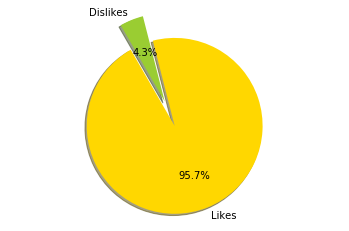

<Figure size 432x288 with 0 Axes>

In [33]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_fr,total_dislikes_fr]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/LikesToDislikes_France.png')

In [34]:
trending_gb = data_gb.sort_values("views", axis=0, ascending=False)
trending_gb.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
video_id,,,,,,
NV-3s2wwC8c,GB,NaN,72469458,729263,27323,41072
0XElmYomloA,GB,NaN,58053323,202514,8712,3509
qtTM2YV3bI8,GB,NaN,54087829,1184184,421473,275795
6YNZlXfW6Ho,GB,NaN,49178073,547875,24493,20091
95Rzsn-zjr0,GB,NaN,46514582,464054,21839,18391
ToY6sjSV8h8,GB,NaN,42844249,476638,17720,18896
xVhnfTwh1OA,GB,NaN,34828669,524685,16519,36102
op4B9sNGi0k,GB,NaN,32798394,645657,16453,27360
p03TIGqEc8o,GB,NaN,31371692,261343,9958,7886


In [35]:
likes = (trending_gb['views']/trending_gb['likes'])

dislikes = (trending_gb['views']/trending_gb['dislikes'])
view = trending_gb['views']

vid_id = trending_gb["video_id"]
total = (trending_gb['likes']+trending_gb['dislikes'])
percent_likes = (trending_gb['likes'] /total) *100
percent_dislikes = (trending_gb['dislikes'] /total) *100

percentages_gb = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_gb = pd.DataFrame(percentages_gb)
percent_data_gb.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
video_id,,,,,,
NV-3s2wwC8c,NaN,72469458,99.373557,2652.324342,96.388646,3.611354
0XElmYomloA,NaN,58053323,286.663258,6663.604568,95.875508,4.124492
qtTM2YV3bI8,NaN,54087829,45.675190,128.330472,73.750745,26.249255
6YNZlXfW6Ho,NaN,49178073,89.761484,2007.841955,95.720760,4.279240
95Rzsn-zjr0,NaN,46514582,100.235279,2129.886075,95.505389,4.494611


In [36]:
#total likes, dislikes, comments, and views
views_gb= data_gb["views"]
total_views_gb = views_gb.sum(axis=0)

comments_gb = data_gb["comment_count"]
total_comments_gb = comments_gb.sum(axis=0)

dislikes_gb = data_gb["dislikes"]
total_dislikes_gb = dislikes_gb.sum(axis=0)

likes_gb= data_gb["likes"]
total_likes_gb = likes_gb.sum(axis=0)

#Print out the data
print("The United Kingdom has",total_likes_gb, "total YouTube Video likes")
print("The United Kingdom has",total_dislikes_gb, "total YouTube Video dislikes")
print("The United Kingdom has",total_comments_gb, "total YouTube video comments")
print("The United Kingdom has",total_views_gb, "total YouTube video views")


The United Kingdom has 67828055 total YouTube Video likes
The United Kingdom has 3342153 total YouTube Video dislikes
The United Kingdom has 7571152 total YouTube video comments
The United Kingdom has 2749768286 total YouTube video views


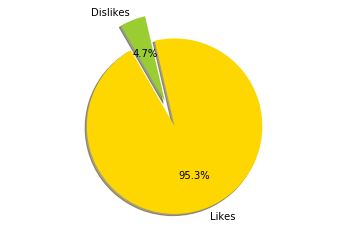

<Figure size 432x288 with 0 Axes>

In [37]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_gb,total_dislikes_gb]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/LikesToDislikes_UnitedKindgom.png')

In [38]:
trending_in = data_in.sort_values("views", axis=0, ascending=False)
trending_in.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
video_id,,,,,,
xmU0s2QtaEY,IN,NaN,40953758,679940,69161,65564
ePO5M5DE01I,IN,NaN,38664360,865914,63908,103907
F2lN25IayH8,IN,NaN,36957773,530146,30924,42087
zMxIW7uwDGg,IN,NaN,35702242,230576,21904,12849
lkfpqGWzHCE,IN,NaN,35276532,45148,36352,3348
dUaCEs3HfdI,IN,NaN,30340611,432533,42767,22895
q2gICJFG6uw,IN,NaN,29503026,320346,80059,31872
aNwWdF8qq-M,IN,NaN,27893636,397141,43165,27596
j-I0Uxbh1uY,IN,NaN,25952473,455361,71793,44916


In [39]:
likes = (trending_in['views']/trending_in['likes'])

dislikes = (trending_in['views']/trending_in['dislikes'])
view = trending_in['views']

vid_id = trending_in["video_id"]
total = (trending_in['likes']+trending_in['dislikes'])
percent_likes = (trending_in['likes'] /total) *100
percent_dislikes = (trending_in['dislikes'] /total) *100

percentages_in = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_in = pd.DataFrame(percentages_in)
percent_data_in.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
video_id,,,,,,
xmU0s2QtaEY,NaN,40953758,60.231429,592.151039,90.767467,9.232533
ePO5M5DE01I,NaN,38664360,44.651501,605.000313,93.126857,6.873143
F2lN25IayH8,NaN,36957773,69.712443,1195.116188,94.488388,5.511612
zMxIW7uwDGg,NaN,35702242,154.839367,1629.941654,91.324461,8.675539
lkfpqGWzHCE,NaN,35276532,781.353150,970.415163,55.396319,44.603681


In [40]:
#total likes, dislikes, comments, and views
views_in= data_in["views"]
total_views_in = views_in.sum(axis=0)

comments_in = data_in["comment_count"]
total_comments_in = comments_in.sum(axis=0)

dislikes_in = data_in["dislikes"]
total_dislikes_in = dislikes_in.sum(axis=0)

likes_in= data_in["likes"]
total_likes_in = likes_in.sum(axis=0)

#Print out the data
print("The country India has",total_likes_in, "total YouTube Video likes")
print("The country India has",total_dislikes_in, "total YouTube Video dislikes")
print("The country India has",total_comments_in, "total YouTube video comments")
print("The country India has",total_views_in, "total YouTube video views")


The country India has 160714056 total YouTube Video likes
The country India has 10782859 total YouTube Video dislikes
The country India has 16557691 total YouTube video comments
The country India has 8259171749 total YouTube video views


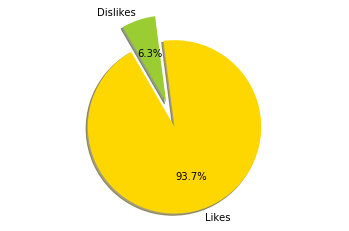

<Figure size 432x288 with 0 Axes>

In [41]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_in,total_dislikes_in]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/LikesToDislikes_India.png')

In [42]:
trending_jp = data_jp.sort_values("views", axis=0, ascending=False)
trending_jp.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
video_id,,,,,,
64UX1npgRkI,JP,NaN,19472216,309752,10303,21731
Wm_vSSlVsV4,JP,NaN,18877505,467498,60323,27680
4T1Zy7G8F7Q,JP,NaN,12150523,100354,8863,6821
D969_pLCniQ,JP,NaN,11510500,47780,13182,6143
x0qZDZAq36U,JP,NaN,6174723,35894,4472,6278
a3WeECF6c_U,JP,NaN,5846018,27321,9607,5039
JspVs6ILBKE,JP,NaN,5161631,18991,2232,9630
X-x7eZOdBFM,JP,NaN,4753667,158784,1953,5351
NxlaKh0sJbU,JP,NaN,4243147,49342,2695,7199


In [43]:
likes = (trending_jp['views']/trending_jp['likes'])

dislikes = (trending_jp['views']/trending_jp['dislikes'])
view = trending_jp['views']

vid_id = trending_jp["video_id"]
total = (trending_jp['likes']+trending_jp['dislikes'])
percent_likes = (trending_jp['likes'] /total) *100
percent_dislikes = (trending_jp['dislikes'] /total) *100

percentages_jp = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_jp = pd.DataFrame(percentages_jp)
percent_data_jp.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
video_id,,,,,,
64UX1npgRkI,NaN,19472216,62.863891,1889.955935,96.780866,3.219134
Wm_vSSlVsV4,NaN,18877505,40.379863,312.940421,88.571315,11.428685
4T1Zy7G8F7Q,NaN,12150523,121.076619,1370.926661,91.884963,8.115037
D969_pLCniQ,NaN,11510500,240.906237,873.198301,78.376694,21.623306
x0qZDZAq36U,NaN,6174723,172.026606,1380.752013,88.921369,11.078631


In [44]:
#total likes, dislikes, comments, and views
views_jp= data_jp["views"]
total_views_jp = views_jp.sum(axis=0)

comments_jp = data_jp["comment_count"]
total_comments_jp = comments_jp.sum(axis=0)

dislikes_jp = data_jp["dislikes"]
total_dislikes_jp = dislikes_jp.sum(axis=0)

likes_jp= data_jp["likes"]
total_likes_jp = likes_jp.sum(axis=0)

#Print out the data
print("The country Japan has",total_likes_jp, "total YouTube Video likes")
print("The country Japan has",total_dislikes_jp, "total YouTube Video dislikes")
print("The country Japan has",total_comments_jp, "total YouTube video comments")
print("The country Japan has",total_views_jp, "total YouTube video views")


The country Japan has 26133378 total YouTube Video likes
The country Japan has 2163188 total YouTube Video dislikes
The country Japan has 4709319 total YouTube video comments
The country Japan has 1502825508 total YouTube video views


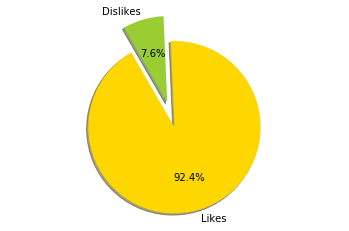

<Figure size 432x288 with 0 Axes>

In [45]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_jp,total_dislikes_jp]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()

#save pie chart as an image
plt.savefig('images/LikesToDislikes_Japan.png')

In [46]:
trending_kr = data_kr.sort_values("views", axis=0, ascending=False)
trending_kr.head(10)

,Country Code,video_id,views,likes,dislikes,comment_count
video_id,,,,,,
32sYGCOYJUM,KR,NaN,29662624,827026,135931,445251
naW9U8MiUY0,KR,NaN,20030814,433044,10649,44330
jY3lRSmdLQg,KR,NaN,19266701,141038,4728,1663
_XyBa8QsVQU,KR,NaN,19121908,284093,10177,72171
swqmsRWM4rY,KR,NaN,14241297,49094,9151,1325
2NlNEj2mCIg,KR,NaN,13344328,621842,12538,68878
c64I9HNpiOY,KR,NaN,12936568,149414,10929,12397
gZItyr1SNjU,KR,NaN,12595519,510643,2886,50741
r1CMjQ0QJ1E,KR,NaN,12340820,295654,10129,27636


In [47]:
likes = (trending_kr['views']/trending_kr['likes'])

dislikes = (trending_kr['views']/trending_kr['dislikes'])
view = trending_kr['views']

vid_id = trending_kr["video_id"]
total = (trending_kr['likes']+trending_kr['dislikes'])
percent_likes = (trending_kr['likes'] /total) *100
percent_dislikes = (trending_kr['dislikes'] /total) *100

percentages_kr = {"Vid Id": vid_id, "Views": view, "Views per like": likes, "Views per dislike": dislikes, "Percent of Likes": percent_likes,
               "Percent of Dislikes": percent_dislikes }

percent_data_kr = pd.DataFrame(percentages_kr)
percent_data_kr.head()

,Vid Id,Views,Views per like,Views per dislike,Percent of Likes,Percent of Dislikes
video_id,,,,,,
32sYGCOYJUM,NaN,29662624,35.866616,218.218243,85.884001,14.115999
naW9U8MiUY0,NaN,20030814,46.255840,1881.004226,97.599917,2.400083
jY3lRSmdLQg,NaN,19266701,136.606454,4075.021362,96.756445,3.243555
_XyBa8QsVQU,NaN,19121908,67.308621,1878.933674,96.541611,3.458389
swqmsRWM4rY,NaN,14241297,290.082230,1556.255819,84.288780,15.711220


In [48]:
#total likes, dislikes, comments, and views
views_kr= data_kr["views"]
total_views_kr = views_kr.sum(axis=0)

comments_kr = data_kr["comment_count"]
total_comments_kr = comments_kr.sum(axis=0)

dislikes_kr = data_kr["dislikes"]
total_dislikes_kr = dislikes_kr.sum(axis=0)

likes_kr= data_kr["likes"]
total_likes_kr = likes_kr.sum(axis=0)

#Print out the data
print("The country South Korea has",total_likes_kr, "total YouTube Video likes")
print("The country South Korea has",total_dislikes_kr, "total YouTube Video dislikes")
print("The country South Korea has",total_comments_kr, "total YouTube video comments")
print("The country South Korea has",total_views_kr, "total YouTube video views")

The country South Korea has 64899933 total YouTube Video likes
The country South Korea has 2761161 total YouTube Video dislikes
The country South Korea has 13744195 total YouTube video comments
The country South Korea has 3706891070 total YouTube video views


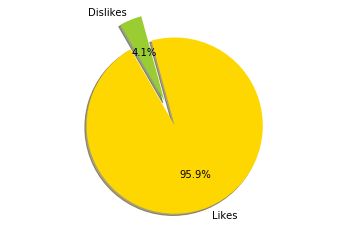

<Figure size 432x288 with 0 Axes>

In [49]:
# Data to plot
labels = 'Likes', 'Dislikes'
sizes = [total_likes_kr,total_dislikes_kr]
colors = ['gold', 'yellowgreen']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.show()


#save pie chart as an image
plt.savefig('images/LikesToDislikes_SouthKorea.png')
